In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms 
import torchvision.datasets as datasets 
from torch.utils.data import DataLoader
from matplotlib import pyplot as plt

In [4]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5), (0.5))
])

train_dataset = datasets.MNIST(
    root='data',
    train=True,
    transform=transform,
    download=True
)

test_dataset = datasets.MNIST(
    root='data',
    train=False,
    transform=transform,
    download=True
)

In [8]:
len(train_dataset), len(test_dataset)

(60000, 10000)

In [9]:
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=True)

In [12]:
data_iter = iter(train_loader)
images, labels = next(data_iter)

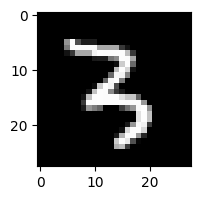

In [17]:
plt.figure(figsize=(2,2))
plt.imshow(images[1].squeeze(), cmap='gray')
plt.show()

In [19]:
labels[1]

tensor(3)

In [32]:
class DigitClassifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.network = nn.Sequential(
            nn.Flatten(),
            nn.Linear(784, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 10)
        )
    
    def forward(self, x):
        return self.network(x)

In [33]:
model = DigitClassifier()
learning_rate = 0.001
epochs = 10

In [34]:
optimizer = optim.Adam(model.parameters(), lr=learning_rate)
criterion = nn.CrossEntropyLoss()

In [35]:
for epoch in range(epochs):
    running_loss = 0.0
    for images, labels in train_loader:
        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)
        
        
        # Backward pass
        optimizer.zero_grad()
        loss.backward()
        
        # Weight updates
        optimizer.step()

        # printing
        running_loss += loss.item()

        
    # printing
    print(f'Epochs: {epoch+1}/{epochs}, Loss: {(running_loss/len(train_loader)):.2f}')

Epochs: 1/10, Loss: 0.39
Epochs: 2/10, Loss: 0.19
Epochs: 3/10, Loss: 0.14
Epochs: 4/10, Loss: 0.11
Epochs: 5/10, Loss: 0.09
Epochs: 6/10, Loss: 0.08
Epochs: 7/10, Loss: 0.07
Epochs: 8/10, Loss: 0.07
Epochs: 9/10, Loss: 0.06
Epochs: 10/10, Loss: 0.05


In [39]:
def getMaxIdx(arr):
    max_val = float('-inf')
    max_idx = 0
    for i in range(len(arr)):
        val = arr[i]
        if(val > max_val):
            max_val = val
            max_idx = i
    return max_idx

In [46]:
model.eval()

total = 0
correct = 0
with torch.no_grad():
    for images, labels in test_loader:
        predicted_outputs = model(images)
        _, predicted = torch.max(predicted_outputs.data, 1)
        
        correct += (predicted == labels).sum().item()
        total += labels.size(0)

print(f'Accuracy on the test dataset: {(100 * correct / total):.2f}%')

Accuracy on the test dataset: 96.52%


In [47]:
# Testing the model
model.eval() # Switch to evaluation mode

all_predicted = [] 
all_labels = []

with torch.no_grad():
    for images, labels in test_loader: 
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)

        # Append Labels and predictions to lists 
        all_labels.extend(labels.numpy())
        all_predicted.extend(predicted.numpy())

In [48]:
len(all_predicted)

10000

In [49]:
from sklearn.metrics import classification_report
report = classification_report(all_labels, all_predicted)
print(report)

              precision    recall  f1-score   support

           0       0.93      1.00      0.96       980
           1       0.98      0.99      0.99      1135
           2       0.97      0.98      0.97      1032
           3       0.93      0.98      0.96      1010
           4       0.99      0.95      0.97       982
           5       0.94      0.97      0.95       892
           6       0.99      0.96      0.97       958
           7       0.98      0.95      0.97      1028
           8       0.99      0.90      0.94       974
           9       0.95      0.97      0.96      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.96      0.96     10000
weighted avg       0.97      0.97      0.97     10000



In [51]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(all_labels, all_predicted)
cm

array([[ 976,    0,    1,    0,    0,    1,    0,    1,    1,    0],
       [   1, 1128,    1,    2,    0,    1,    0,    1,    1,    0],
       [   9,    1, 1012,    1,    1,    0,    1,    5,    2,    0],
       [   0,    0,    4,  989,    0,   13,    0,    1,    0,    3],
       [   4,    5,    3,    1,  931,    4,    2,    3,    2,   27],
       [  11,    2,    0,   11,    0,  862,    3,    0,    2,    1],
       [  25,    3,    1,    0,    5,    6,  915,    0,    3,    0],
       [   4,    8,   13,   14,    1,    0,    0,  981,    0,    7],
       [  15,    1,   11,   34,    1,   20,    0,    6,  877,    9],
       [   6,    4,    0,    6,    3,    7,    0,    2,    0,  981]])

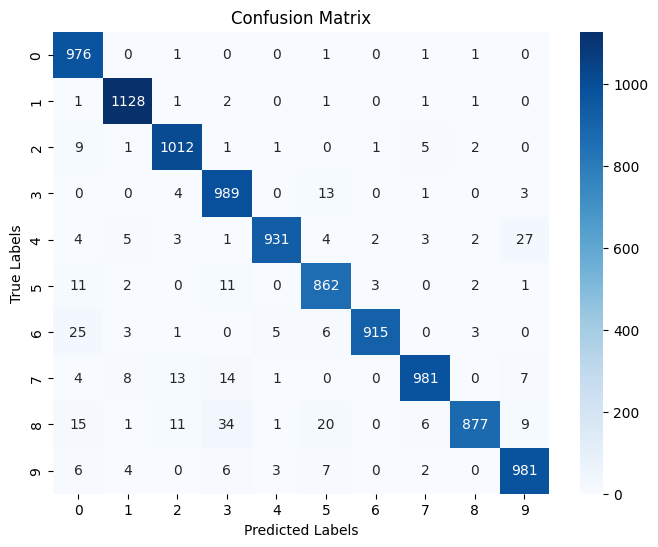

In [52]:
# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=range(len(cm)), yticklabels=range(len(cm)))
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()